# **INFO5731 Assignment 3**

In this assignment, we will delve into various aspects of natural language processing (NLP) and text analysis. The tasks are designed to deepen your understanding of key NLP concepts and techniques, as well as to provide hands-on experience with practical applications.

Through these tasks, you'll gain practical experience in NLP techniques such as N-gram analysis, TF-IDF, word embedding model creation, and sentiment analysis dataset creation.

**Expectations**:
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).


**Total points**: 100

**Deadline**: See Canvas

**Late Submission will have a penalty of 10% reduction for each day after the deadline.**


## Question 1 (30 points)

**Understand N-gram**

Write a python program to conduct N-gram analysis based on the dataset in your assignment two. You need to write codes from scratch instead of using any pre-existing libraries to do so:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the noun phrases and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from textblob import TextBlob
from textblob import Word
nltk.download('wordnet')

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# IMDb reviews URL
url = 'https://www.imdb.com/title/tt15398776/reviews?ref_=tt_urv'

# Function to fetch data from the URL using BeautifulSoup
def fetch_data(url):
    response = requests.get(url)
    if response.status_code == 200:
        return response.text
    else:
        print("Failed to fetch data from URL:", url)
        return None

# Function for text preprocessing
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove HTML tags and special characters
    text = re.sub('<.*?>', '', text)
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    # Tokenize text
    tokens = nltk.word_tokenize(text)
    # Remove stopwords and lemmatize words
    stop_words = set(stopwords.words('english'))
    tokens = [Word(word).lemmatize() for word in tokens if word not in stop_words]
    return tokens

# Function to extract reviews from IMDb page using BeautifulSoup
def fetch_reviews(url):
    html_content = fetch_data(url)
    if html_content:
        soup = BeautifulSoup(html_content, 'html.parser')
        reviews = soup.find_all("div", class_="text")
        return [review.get_text() for review in reviews]
    else:
        return None

# Fetch reviews from IMDb
reviews =fetch_reviews(url)

# Create DataFrame from the collected data
df = pd.DataFrame(reviews, columns=['Review'])

# Apply text preprocessing to 'Review' column
df['Cleaned Review'] = df['Review'].apply(preprocess_text)

# Function to calculate n-gram frequencies
def calculate_ngram_frequencies(tokens, n):
    ngrams = list(nltk.ngrams(tokens, n))
    frequency_dist = nltk.FreqDist(ngrams)
    return frequency_dist

# Apply functions to calculate frequencies and probabilities
df['Trigram Frequencies'] = df['Cleaned Review'].apply(lambda x: calculate_ngram_frequencies(x, 3))
df['Bigram Frequencies'] = df['Cleaned Review'].apply(lambda x: calculate_ngram_frequencies(x, 2))

# Display the DataFrame
print(df.head(100))


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                               Review  \
0   One of the most anticipated films of the year ...   
1   You'll have to have your wits about you and yo...   
2   I'm a big fan of Nolan's work so was really lo...   
3   "Oppenheimer" is a biographical thriller film ...   
4   This movie is just... wow! I don't think I hav...   
5   I was familiar with the Manhattan project and ...   
6   Is it just me or did anyone else find this mov...   
7   I'm still collecting my thoughts after experie...   
8   Cillian Murphy is exceptional in the lead role...   
9   I may consider myself lucky to be alive to wat...   
10  Okay, Nolan fans, get your fingers poised to d...   
11  Oppenheimer might be the best film I watched i...   
12  The film looks great is brilliantly acted but ...   
13  It saddens me that so many people are mistakin...   
14  0 out of 10 starsChristopher Nolan's Oppenheim...   
15  At its core Oppenheimer is a technical masterp...   
16  Just came out of the theate

## Question 2 (25 points)

**Undersand TF-IDF and Document representation**

Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the documents-terms weights (tf * idf) matrix.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using cosine similarity.

Note: You need to write codes from scratch instead of using any pre-existing libraries to do so.

In [6]:
import math

# Function to tokenize documents
def tokenize(documents):
    tokens = []
    for doc in documents:
        tokens.append(doc.lower().split())
    return tokens

# Function to calculate TF (Term Frequency)
def calculate_tf(tokens):
    tf_values = []
    for doc in tokens:
        doc_tf = {}
        total_words = len(doc)
        for word in set(doc):
            doc_tf[word] = doc.count(word) / total_words
        tf_values.append(doc_tf)
    return tf_values

# Function to calculate IDF (Inverse Document Frequency)
def calculate_idf(tokens):
    idf_values = {}
    total_documents = len(tokens)
    for doc in tokens:
        for word in set(doc):
            idf_values[word] = idf_values.get(word, 0) + 1

    for word, freq in idf_values.items():
        idf_values[word] = math.log(total_documents / (1 + freq))

    return idf_values

# Function to calculate TF-IDF matrix
def calculate_tfidf(tokens, tf_values, idf_values):
    tfidf_matrix = []
    for i, doc in enumerate(tokens):
        tfidf_doc = {}
        for word in set(doc):
            tfidf_doc[word] = tf_values[i][word] * idf_values[word]
        tfidf_matrix.append(tfidf_doc)
    return tfidf_matrix

# Function to calculate cosine similarity between query and documents
def calculate_cosine_similarity(query_tfidf, doc_tfidf):
    dot_product = sum(query_tfidf[word] * doc_tfidf.get(word, 0) for word in query_tfidf)
    query_norm = math.sqrt(sum(query_tfidf[word]**2 for word in query_tfidf))
    doc_norm = math.sqrt(sum(doc_tfidf[word]**2 for word in doc_tfidf))
    if query_norm != 0 and doc_norm != 0:
        return dot_product / (query_norm * doc_norm)
    else:
        return 0

# Function to fetch HTML content from URL and extract reviews
def fetch_and_extract_reviews(url):
    html_content = fetch_data(url)
    if html_content:
        soup = BeautifulSoup(html_content, 'html.parser')
        reviews = soup.find_all("div", class_="text")
        return [review.get_text() for review in reviews]
    else:
        return []

# Main function
def main():
    # Example IMDb reviews URL
    url = 'https://www.imdb.com/title/tt15398776/reviews?ref_=tt_urv'

    # Fetch and extract reviews from IMDb
    documents = fetch_and_extract_reviews(url)
    print(documents)

    if not documents:
        print("Failed to fetch or extract reviews.")
        return

    # Query
    query = "An Outstanding movie with a haunting performance and best character development"

    # Tokenize documents
    tokens = tokenize(documents + [query])

    # Calculate TF
    tf_values = calculate_tf(tokens)

    # Calculate IDF
    idf_values = calculate_idf(tokens)

    # Calculate TF-IDF matrix
    tfidf_matrix = calculate_tfidf(tokens, tf_values, idf_values)

    # Query TF-IDF
    query_tfidf = tfidf_matrix[-1]

    # Calculate cosine similarity
    cosine_scores = []
    for i in range(len(documents)):
        doc_tfidf = tfidf_matrix[i]
        similarity = calculate_cosine_similarity(query_tfidf, doc_tfidf)
        cosine_scores.append((i+1, similarity))

    # Sort documents based on cosine similarity scores
    cosine_scores.sort(key=lambda x: x[1], reverse=True)

    # Print ranked documents
    print("Ranked Documents:")
    for doc_index, score in cosine_scores:
        print(f"Document {doc_index}: Cosine Similarity Score: {score}")

if __name__ == "__main__":
    main()


["One of the most anticipated films of the year for many people, myself included, Oppenheimer largely delivers. Much of it's great. I feel like I loved two of its three hours, and liked the other hour.... but it's that fact that stops me from adoring the entire thing. I know with Christopher Nolan's Dunkirk, that clicked on a second watch, so maybe Oppenheimer will need one too. That being said, I don't feel the need to rush out and see it again too soon, because it was a long and exhausting film.But in many ways, I can't deny it was an exceptionally well made one. It looks and sounds as amazing as you'd expect, feeling as though it accurately captures the time period it's set in, and containing amazing sound design and one of the year's best scores so far. Every performance is good to great, but the film belongs to Cillian Murphy, and I feel like he's the lead actor to beat at this stage, if we're talking (early) awards consideration.The film's at its best when it focuses on being a p

## Question 3 (25 points)

**Create your own word embedding model**

Use the data you collected for assignment 2 to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

In [21]:
import re
import requests
from bs4 import BeautifulSoup
from gensim.models import Word2Vec
model=None
def fetch_data(url):
    try:
        response = requests.get(url)
        response.raise_for_status()  # Raise an exception for HTTP errors (status code >= 400)
        return response.text
    except requests.RequestException as e:
        print("Failed to fetch data from URL:", url)
        print("Error:", e)
        return None

def preprocess_text(text):
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags using regex
    text = re.sub(r'\s+', ' ', text)    # Remove extra whitespace
    text = text.lower()                 # Convert text to lowercase
    return text

def get_reviews(url):
    html_content = fetch_data(url)
    if html_content:
        soup = BeautifulSoup(html_content, 'html.parser')
        reviews = [review.text for review in soup.find_all("div", class_="text show-more__control")]
        return reviews
    return None

def tokenize_reviews(reviews):
    return [preprocess_text(review).split() for review in reviews]

def train_word2vec_model(tokenized_reviews):
    global model
    model = Word2Vec(sentences=tokenized_reviews, vector_size=300, window=5, min_count=5, workers=4)
    return model

def main():
    global model
    url = "https://www.imdb.com/title/tt15398776/reviews?ref_=tt_urv"
    reviews = get_reviews(url)
    if reviews:
        tokenized_reviews = tokenize_reviews(reviews)
        model = train_word2vec_model(tokenized_reviews)
        word_embeddings = model.wv

        # Example: Get embedding for a specific word
        embedding_for_movie = word_embeddings['movie']
        print("Embedding for 'movie':", embedding_for_movie)
    else:
        print("No reviews found.")


if __name__ == "__main__":
    main()


Embedding for 'movie': [-2.49943547e-02  1.88115448e-01 -6.79207034e-03  5.82790859e-02
 -7.48905689e-02 -1.18538477e-01  1.45925775e-01  3.21512103e-01
 -2.01084204e-02 -1.35827035e-01  8.67350549e-02 -1.02501102e-01
  3.30550633e-02  1.97177613e-03 -1.79051347e-02 -1.11310989e-01
  8.57352987e-02  6.85849935e-02  1.76902805e-02 -8.51235464e-02
 -4.54251170e-02 -2.15367023e-02  9.69781652e-02  4.92732637e-02
  7.27016153e-03 -6.28595799e-02 -2.30783165e-01  2.13248804e-02
 -5.43854088e-02 -1.65336415e-01  7.95776173e-02 -4.04417403e-02
  7.12199584e-02  2.63355263e-02 -1.10862233e-01  4.75102365e-02
  7.36476034e-02 -1.40101030e-01 -4.11897786e-02  1.40431141e-02
 -5.02284877e-02 -1.13808652e-02  3.68060581e-02 -1.31531999e-01
  1.00068703e-01  1.24079511e-01  5.33623919e-02  2.19847225e-02
  1.93124283e-02  7.77287409e-02  1.35540897e-02  1.13531621e-02
 -5.25910482e-02  3.97998914e-02 -1.40764238e-02  7.54866228e-02
  2.41226312e-02  3.69747318e-02 -1.58023753e-03 -1.52034108e-02
 -

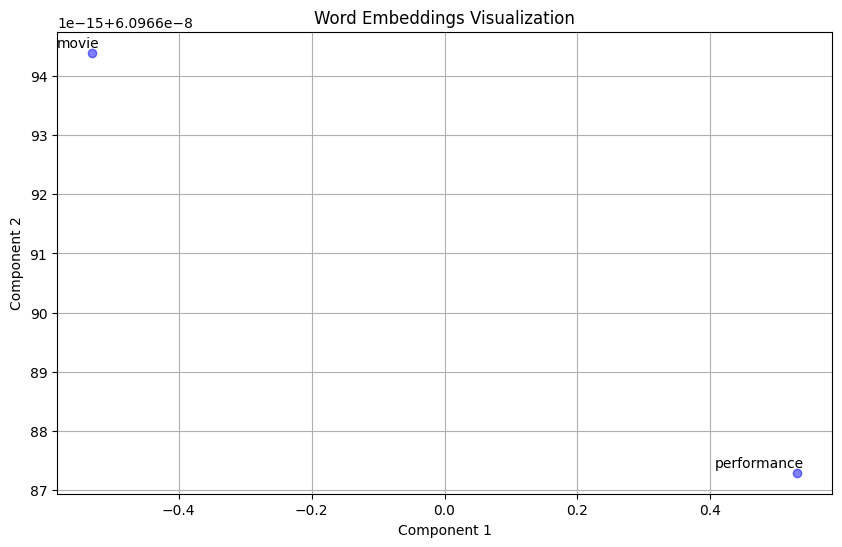

In [22]:
# Load necessary libraries
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Define the function to plot embeddings
def plot_embeddings(model, words):
    # Filter out words not present in the vocabulary
    words_in_vocab = [word for word in words if word in model.wv]
    word_vectors = model.wv[words_in_vocab] if words_in_vocab else None

    if word_vectors is not None:
        # Reduce dimensionality using PCA for visualization
        coordinates = PCA(n_components=2).fit_transform(word_vectors)
        plt.figure(figsize=(10, 6))
        plt.scatter(coordinates[:, 0], coordinates[:, 1], marker='o', c='blue', alpha=0.5)

        # Annotate each point with its corresponding word
        for i, word in enumerate(words_in_vocab):
            plt.annotate(word, xy=(coordinates[i, 0], coordinates[i, 1]), xytext=(5, 2), textcoords='offset points', ha='right', va='bottom')

        plt.xlabel('Component 1')
        plt.ylabel('Component 2')
        plt.title('Word Embeddings Visualization')
        plt.grid(True)
        plt.show()
    else:
        print("No valid words to visualize.")

# Assuming you've already trained your Word2Vec model
# Load your Word2Vec model
# Sample words to visualize
words_to_visualize = ['movie', 'performance', 'outstanding', 'haunting']

# Plot word embeddings
plot_embeddings(model, words_to_visualize)


## Question 4 (20 Points)

**Create your own training and evaluation data for sentiment analysis.**

 **You don't need to write program for this question!**

 For example, if you collected a movie review or a product review data, then you can do the following steps:

*   Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral).

*   Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew.

*   This datset will be used for assignment four: sentiment analysis and text classification.


In [ ]:
# The GitHub link of your final csv file

# Link: https://github.com/saketh269/INFO-5731---Computational-Methods-for-Information-Systems/blob/main/sentimental_reviews.csv



[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


All reviews saved to 'reviews_all.csv'.


# Mandatory Question

Provide your thoughts on the assignment. What did you find challenging, and what aspects did you enjoy? Your opinion on the provided time to complete the assignment.

In [23]:
# learning more day by day